In [48]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/content/Kaggle/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/Kaggle/Chennai houseing sale.csv


In [49]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor

pd.options.display.float_format = '{:.2f}'.format

import warnings                 # to deal with warning messages
warnings.filterwarnings('ignore')

In [51]:
df=pd.read_csv("/content/Kaggle/Chennai houseing sale.csv")
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.00,1.00,3,AbNormal,Yes,...,AllPub,Paved,A,4.00,3.90,4.90,4.33,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.00,1.00,5,AbNormal,No,...,AllPub,Gravel,RH,4.90,4.20,2.50,3.77,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.00,1.00,3,AbNormal,Yes,...,ELO,Gravel,RL,4.10,3.80,2.20,3.09,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.00,2.00,5,Family,No,...,NoSewr,Paved,I,4.70,3.90,3.60,4.01,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.00,1.00,3,AbNormal,Yes,...,AllPub,Gravel,C,3.00,2.50,4.10,3.29,237000,74063,7406250


In [52]:
df1=df.drop(['QS_OVERALL','QS_BEDROOM','QS_BATHROOM','QS_ROOMS','MZZONE'],axis='columns')
df1.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.00,1.00,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.00,1.00,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.00,1.00,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.00,2.00,5,Family,No,18-03-1988,Others,NoSewr,Paved,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.00,1.00,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,237000,74063,7406250


In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  REG_FEE        7109 non-null   int64  
 15  COMMIS         7109 non-null   int64  
 16  SALES_PRICE    7109 non-null   int64  
dtypes: float64(2), int64(6), object(9)
memory usage: 944

In [54]:
df1.isnull().sum()

,0
PRT_ID,0
AREA,0
INT_SQFT,0
DATE_SALE,0
DIST_MAINROAD,0
N_BEDROOM,1
N_BATHROOM,5
N_ROOM,0
SALE_COND,0
PARK_FACIL,0


In [55]:
df2=df1.dropna()
df2.isnull().sum()

,0
PRT_ID,0
AREA,0
INT_SQFT,0
DATE_SALE,0
DIST_MAINROAD,0
N_BEDROOM,0
N_BATHROOM,0
N_ROOM,0
SALE_COND,0
PARK_FACIL,0


In [56]:
for col in df.columns:
    if df[col].dtype=='object':
        print()
        print(col)
        print(df[col].unique())


PRT_ID
['P03210' 'P09411' 'P01812' ... 'P09594' 'P06508' 'P09794']

AREA
['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']

DATE_SALE
['04-05-2011' '19-12-2006' '04-02-2012' ... '28-03-2014' '25-08-2006'
 '13-07-2005']

SALE_COND
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']

PARK_FACIL
['Yes' 'No' 'Noo']

DATE_BUILD
['15-05-1967' '22-12-1995' '09-02-1992' ... '01-09-1978' '11-08-1977'
 '24-07-1961']

BUILDTYPE
['Commercial' 'Others' 'Other' 'House' 'Comercial']

UTILITY_AVAIL
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']

STREET
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']

MZZONE
['A' 'RH' 'RL' 'I' 'C' 'RM']


In [57]:
df2.AREA.replace(['Ana Nagar','Ann Nagar'],'Anna Nagar',inplace=True)
df2.AREA.replace('Karapakkam','Karapakam',inplace=True)
df2.AREA.replace('Adyr','Adyar',inplace=True)
df2.AREA.replace('Velchery','Velachery',inplace=True)
df2.AREA.replace(['Chormpet','Chrmpet','Chrompt'],'Chrompet',inplace=True)
df2.AREA.replace('KKNagar','KK Nagar',inplace=True)
df2.AREA.replace('TNagar','T Nagar',inplace=True)
df2.SALE_COND.replace('Ab Normal','AbNormal',inplace=True)
df2.SALE_COND.replace(['PartiaLl','Partiall'],'Partial',inplace=True)
df2.SALE_COND.replace('AdjLand','Adj Land',inplace=True)
df2.PARK_FACIL.replace('Noo','No',inplace=True)
df2.BUILDTYPE.replace('Comercial','Commercial',inplace=True)
df2.BUILDTYPE.replace('Other','Others',inplace=True)
# df2.UTILITY_AVAIL.replace('NoSewr','NoSeWa',inplace=True)
# df2.UTILITY_AVAIL.replace('AllPub','All Pub',inplace=True)
df2.UTILITY_AVAIL.replace('AllPub','Yes',inplace=True)
df2.UTILITY_AVAIL.replace('All Pub','Yes',inplace=True)
df2.UTILITY_AVAIL.replace('NoSewr','Yes',inplace=True)
df2.UTILITY_AVAIL.replace('NoSeWa','Yes',inplace=True)
df2.UTILITY_AVAIL.replace('NoSewr ','Yes',inplace=True)
df2.UTILITY_AVAIL.replace('ELO','No',inplace=True)
df2.STREET.replace('Pavd','Paved',inplace=True)
df2.STREET.replace('NoAccess','No Access',inplace=True)

In [58]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7103 entries, 0 to 7108
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7103 non-null   object 
 1   AREA           7103 non-null   object 
 2   INT_SQFT       7103 non-null   int64  
 3   DATE_SALE      7103 non-null   object 
 4   DIST_MAINROAD  7103 non-null   int64  
 5   N_BEDROOM      7103 non-null   float64
 6   N_BATHROOM     7103 non-null   float64
 7   N_ROOM         7103 non-null   int64  
 8   SALE_COND      7103 non-null   object 
 9   PARK_FACIL     7103 non-null   object 
 10  DATE_BUILD     7103 non-null   object 
 11  BUILDTYPE      7103 non-null   object 
 12  UTILITY_AVAIL  7103 non-null   object 
 13  STREET         7103 non-null   object 
 14  REG_FEE        7103 non-null   int64  
 15  COMMIS         7103 non-null   int64  
 16  SALES_PRICE    7103 non-null   int64  
dtypes: float64(2), int64(6), object(9)
memory usage: 998.9+ K

In [59]:
df2['total_price']=df2['REG_FEE']+df2['COMMIS']+df2['SALES_PRICE']

In [60]:
df2['DATE_SALE'] = pd.to_datetime(df2['DATE_SALE'],format='%d-%m-%Y')
df2['DATE_BUILD'] = pd.to_datetime(df2['DATE_BUILD'],format='%d-%m-%Y')

In [61]:
df2['AGE'] = pd.DatetimeIndex(df2['DATE_SALE']).year - pd.DatetimeIndex(df2['DATE_BUILD']).year

In [62]:
df2['N_BEDROOM']=df2['N_BEDROOM'].astype(int)
df2['N_BATHROOM']=df2['N_BATHROOM'].astype(int)

In [63]:
import seaborn as sns

In [64]:
df2.describe()

,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,DATE_BUILD,REG_FEE,COMMIS,SALES_PRICE,total_price,AGE
count,7103.00,7103,7103.00,7103.00,7103.00,7103.00,7103,7103.00,7103.00,7103.00,7103.00,7103.00
mean,1382.12,2010-04-06 11:12:03.243699968,99.58,1.64,1.21,3.69,1985-12-28 20:14:21.607771392,376952.71,141055.36,10894773.48,11412781.55,24.27
min,500.00,2004-01-16 00:00:00,0.00,1.00,1.00,2.00,1949-10-28 00:00:00,71177.00,5055.00,2156875.00,2253935.00,3.00
25%,993.00,2008-10-17 00:00:00,50.00,1.00,1.00,3.00,1976-08-20 12:00:00,272469.00,84252.50,8270900.00,8645484.50,14.00
50%,1373.00,2010-05-03 00:00:00,99.00,1.00,1.00,4.00,1986-10-13 00:00:00,349509.00,127644.00,10334640.00,10819523.00,23.00
75%,1744.00,2011-09-15 00:00:00,148.00,2.00,1.00,4.00,1996-07-01 00:00:00,451544.50,184534.00,12994215.00,13614948.50,34.00
max,2500.00,2015-02-17 00:00:00,200.00,4.00,2.00,6.00,2010-11-12 00:00:00,983922.00,495405.00,23667340.00,24969043.00,55.00
std,457.48,NaN,57.40,0.80,0.41,1.02,NaN,143088.11,78775.88,3769548.87,3945930.35,12.33


In [65]:
df3=df2.drop(['SALES_PRICE','COMMIS','REG_FEE','DATE_BUILD','DATE_SALE',],axis='columns')
df3.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,total_price,AGE
0,P03210,Karapakam,1004,131,1,1,3,AbNormal,Yes,Commercial,Yes,Paved,8124400,44
1,P09411,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,Yes,Gravel,22781941,11
2,P01812,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,No,Gravel,13672408,20
3,P05346,Velachery,1855,14,3,2,5,Family,No,Others,Yes,Paved,10063653,22
4,P06210,Karapakam,1226,84,1,1,3,AbNormal,Yes,Others,Yes,Gravel,7717313,30


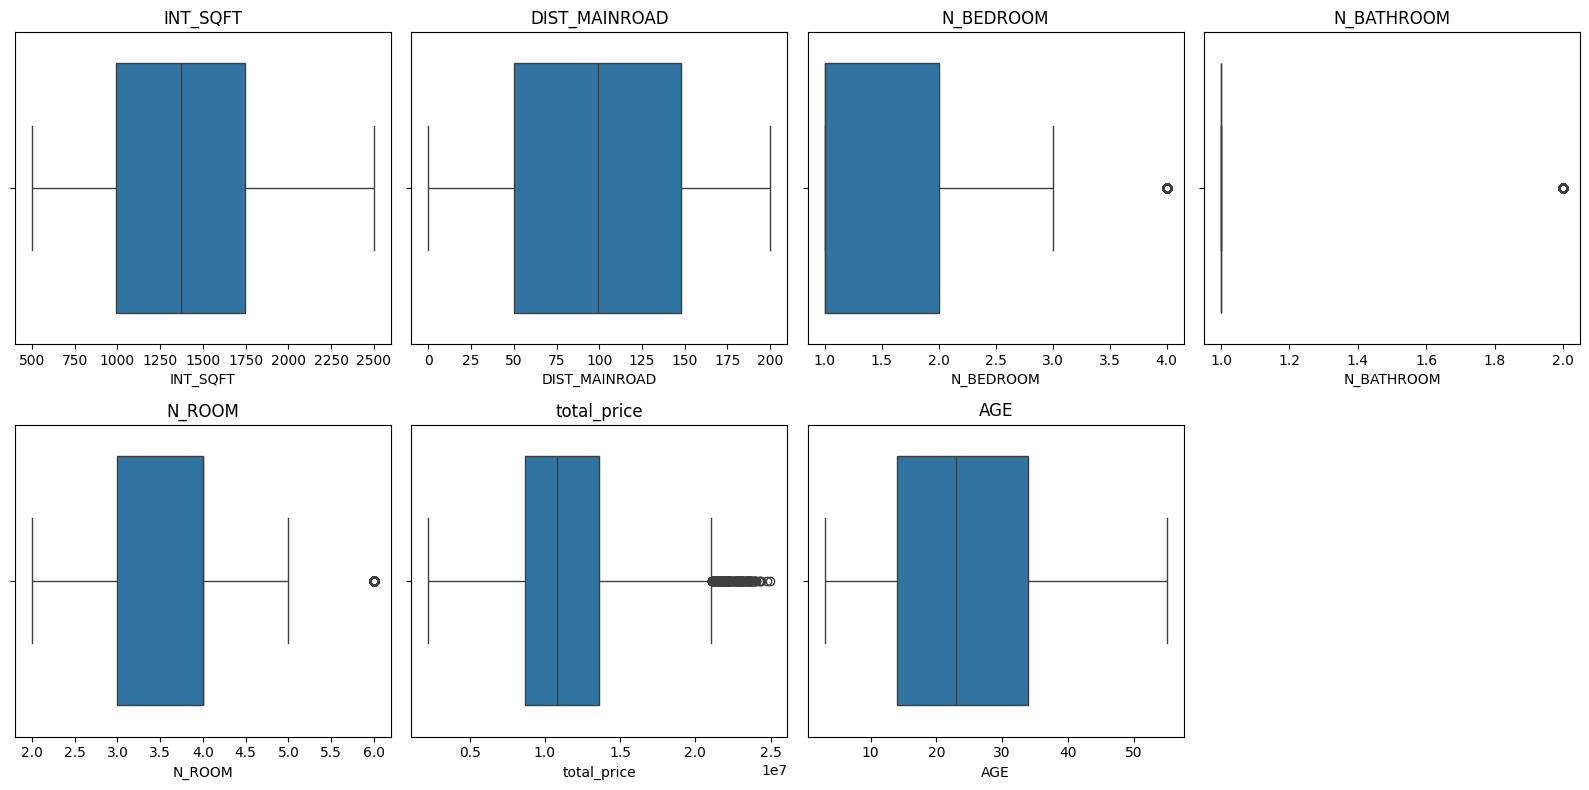

In [66]:
columns_to_analyze = ['INT_SQFT','DIST_MAINROAD','N_BEDROOM','N_BATHROOM','N_ROOM','total_price','AGE']

plt.figure(figsize=(16, 8))

for i, column in enumerate(columns_to_analyze):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x=df3[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

In [67]:
Q1 = df3["total_price"].quantile(0.25)
Q3 = df3["total_price"].quantile(0.75)
IQR = Q3 - Q1

In [68]:
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

In [69]:
outlier_mask = (df3["total_price"] < lower_threshold) | (df3["total_price"] > upper_threshold)

In [70]:
df3_cleaned = df3[~outlier_mask]

In [71]:
df4=df3_cleaned.copy()

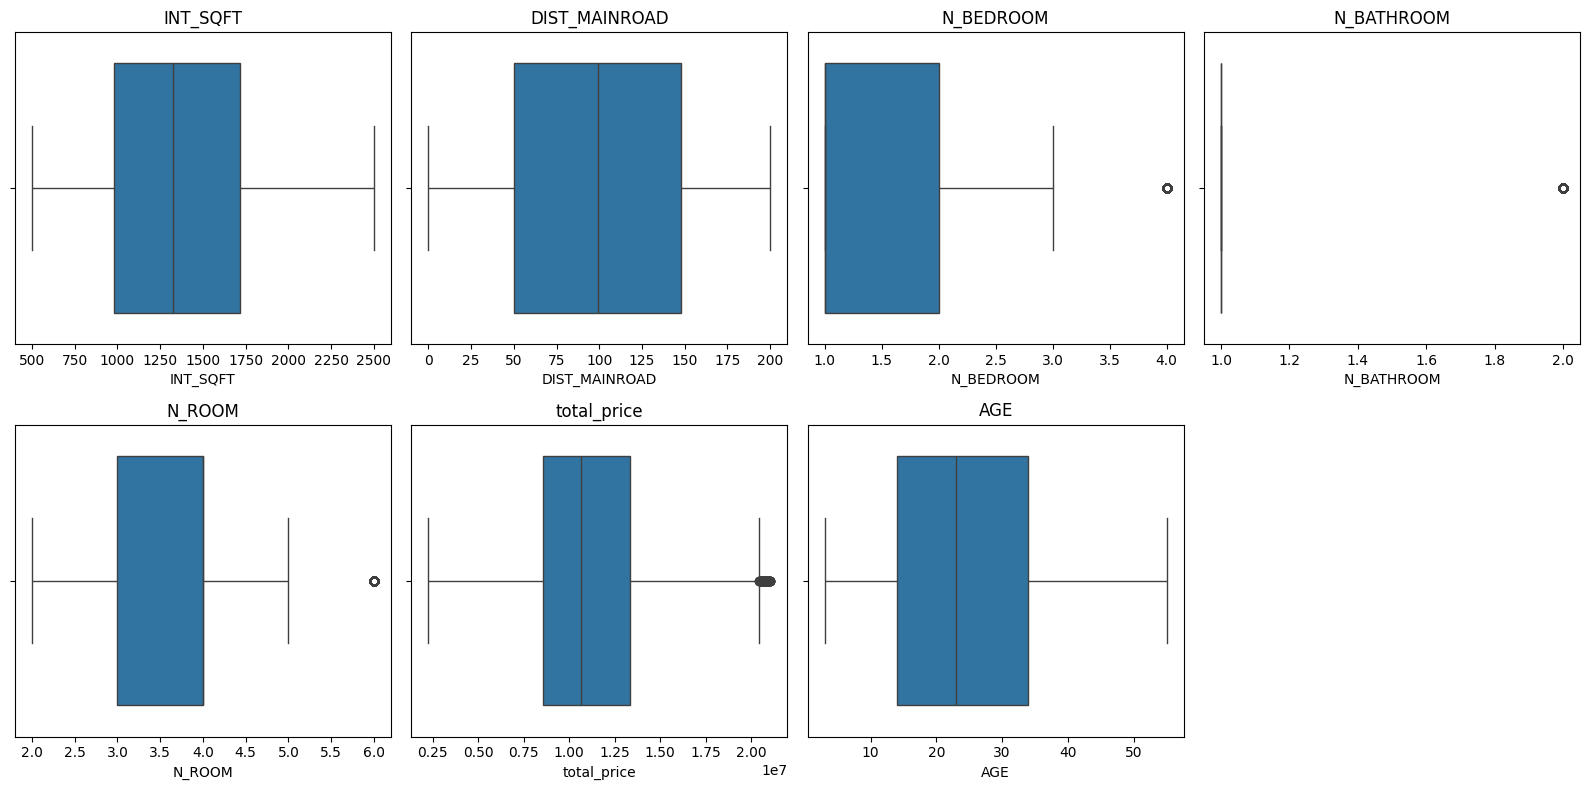

In [72]:
columns_to_analyze = ['INT_SQFT','DIST_MAINROAD','N_BEDROOM','N_BATHROOM','N_ROOM','total_price','AGE']

plt.figure(figsize=(16, 8))

for i, column in enumerate(columns_to_analyze):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x=df4[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

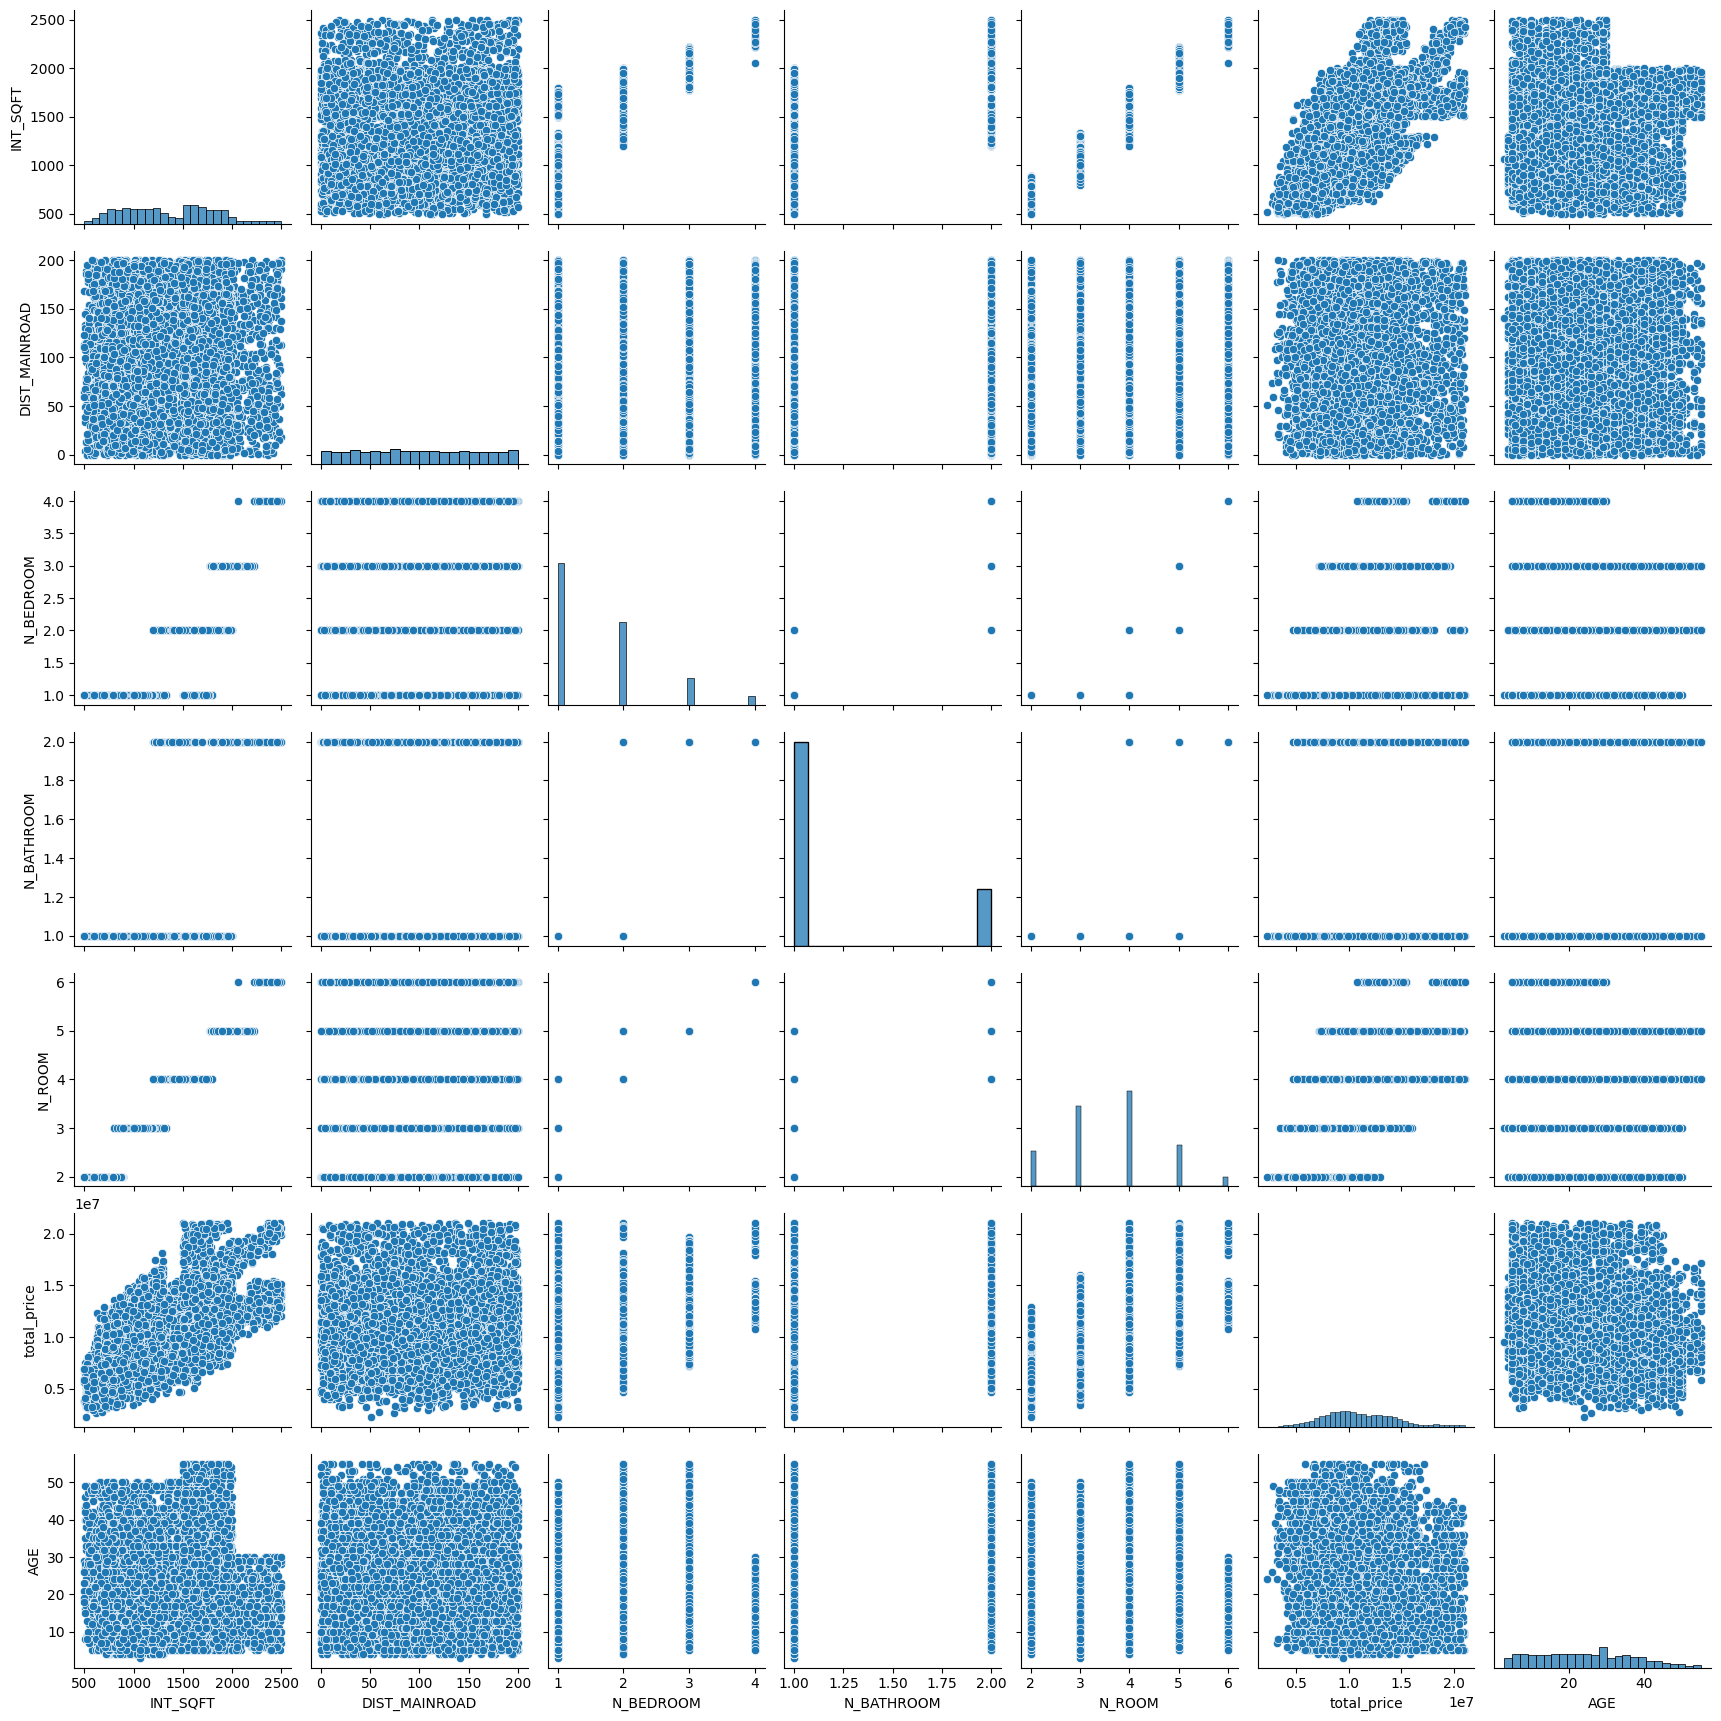

In [73]:
sns.pairplot(df4)
plt.show()

In [74]:
df4.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,total_price,AGE
0,P03210,Karapakam,1004,131,1,1,3,AbNormal,Yes,Commercial,Yes,Paved,8124400,44
2,P01812,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,No,Gravel,13672408,20
3,P05346,Velachery,1855,14,3,2,5,Family,No,Others,Yes,Paved,10063653,22
4,P06210,Karapakam,1226,84,1,1,3,AbNormal,Yes,Others,Yes,Gravel,7717313,30
5,P00219,Chrompet,1220,36,2,1,4,Partial,No,Commercial,Yes,No Access,13002093,5


In [75]:
from sklearn.preprocessing import OneHotEncoder

In [76]:
columns_to_encode = ['AREA','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET']
encoded_df = pd.get_dummies(df4[columns_to_encode],dtype=int)

In [77]:
encoded_df.head()

,AREA_Adyar,AREA_Anna Nagar,AREA_Chrompet,AREA_KK Nagar,AREA_Karapakam,AREA_T Nagar,AREA_Velachery,PARK_FACIL_No,PARK_FACIL_Yes,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,UTILITY_AVAIL_No,UTILITY_AVAIL_Yes,STREET_Gravel,STREET_No Access,STREET_Paved
0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1
2,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0
3,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1
4,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0
5,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0


In [78]:
df5=pd.concat([df4,encoded_df],axis=1)
df5.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,...,PARK_FACIL_No,PARK_FACIL_Yes,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,UTILITY_AVAIL_No,UTILITY_AVAIL_Yes,STREET_Gravel,STREET_No Access,STREET_Paved
0,P03210,Karapakam,1004,131,1,1,3,AbNormal,Yes,Commercial,...,0,1,1,0,0,0,1,0,0,1
2,P01812,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,...,0,1,1,0,0,1,0,1,0,0
3,P05346,Velachery,1855,14,3,2,5,Family,No,Others,...,1,0,0,0,1,0,1,0,0,1
4,P06210,Karapakam,1226,84,1,1,3,AbNormal,Yes,Others,...,0,1,0,0,1,0,1,1,0,0
5,P00219,Chrompet,1220,36,2,1,4,Partial,No,Commercial,...,1,0,1,0,0,0,1,0,1,0


In [79]:
df6=df5.copy()

<Axes: xlabel='UTILITY_AVAIL', ylabel='total_price'>

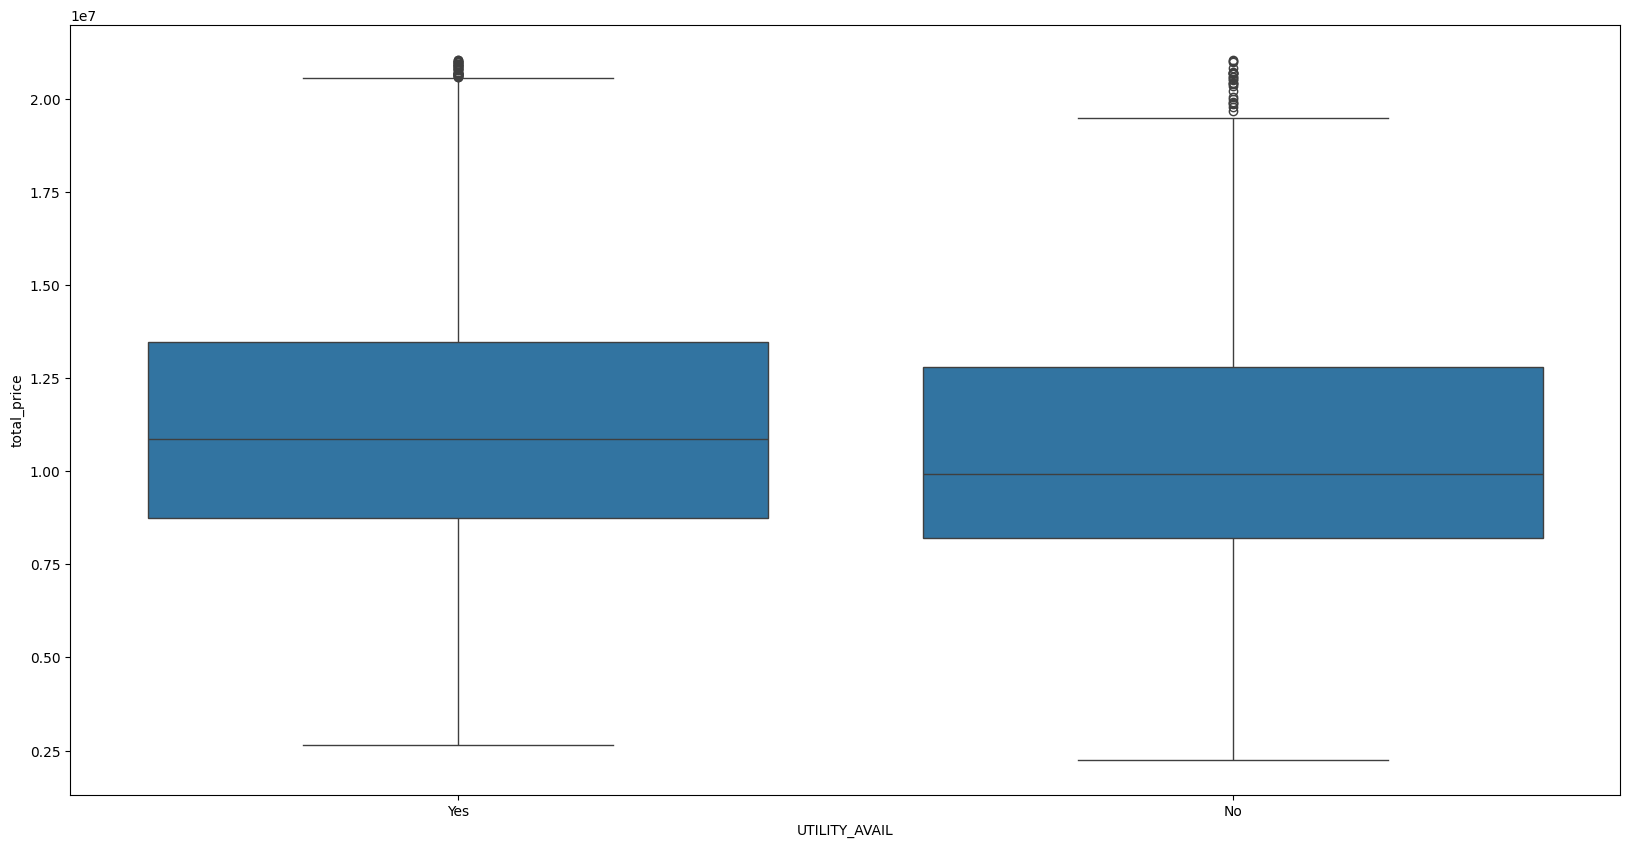

In [80]:
sns.boxplot(data=df6, x='UTILITY_AVAIL',y='total_price')

In [81]:
#Train test split
y=df6['total_price']
X=df6.drop(['PRT_ID','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','AREA','total_price','DIST_MAINROAD','AGE','N_ROOM'],axis='columns')

In [82]:
X.head()

,INT_SQFT,N_BEDROOM,N_BATHROOM,AREA_Adyar,AREA_Anna Nagar,AREA_Chrompet,AREA_KK Nagar,AREA_Karapakam,AREA_T Nagar,AREA_Velachery,PARK_FACIL_No,PARK_FACIL_Yes,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,UTILITY_AVAIL_No,UTILITY_AVAIL_Yes,STREET_Gravel,STREET_No Access,STREET_Paved
0,1004,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1
2,909,1,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0
3,1855,3,2,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1
4,1226,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0
5,1220,2,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0


In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [84]:
lr_clf=xgb.XGBRegressor(base_score=0.5,n_estimators=1000,learning_rate=0.0145,min_child_weight= 2,colsample_bytree=1, subsample = 0.7,  gamma= 4, max_depth=4)
lr_clf.set_params(early_stopping_rounds=20)
lr_clf.fit(X_train,y_train,eval_set=[(X_test,y_test)])
lr_clf.score(X_test,y_test)

[0]	validation_0-rmse:11414215.30334
[1]	validation_0-rmse:11251428.23502
[2]	validation_0-rmse:11091502.18969
[3]	validation_0-rmse:10933952.24295
[4]	validation_0-rmse:10778731.11829
[5]	validation_0-rmse:10625939.52590
[6]	validation_0-rmse:10474685.16691
[7]	validation_0-rmse:10325956.62469
[8]	validation_0-rmse:10179835.82009
[9]	validation_0-rmse:10035754.87084
[10]	validation_0-rmse:9894139.89298
[11]	validation_0-rmse:9753266.00813
[12]	validation_0-rmse:9615956.72388
[13]	validation_0-rmse:9480645.78261
[14]	validation_0-rmse:9346823.06601
[15]	validation_0-rmse:9214961.39778
[16]	validation_0-rmse:9084705.59603
[17]	validation_0-rmse:8956671.46312
[18]	validation_0-rmse:8830598.30975
[19]	validation_0-rmse:8706300.13810
[20]	validation_0-rmse:8583148.64444
[21]	validation_0-rmse:8461720.92606
[22]	validation_0-rmse:8342917.31489
[23]	validation_0-rmse:8225620.70754
[24]	validation_0-rmse:8109938.96563
[25]	validation_0-rmse:7996534.42616
[26]	validation_0-rmse:7883802.87403
[

0.9314520955085754

In [86]:
y_pred=lr_clf.predict(X_test)

In [87]:
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2063 entries, 5468 to 3371
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   INT_SQFT              2063 non-null   int64
 1   N_BEDROOM             2063 non-null   int64
 2   N_BATHROOM            2063 non-null   int64
 3   AREA_Adyar            2063 non-null   int64
 4   AREA_Anna Nagar       2063 non-null   int64
 5   AREA_Chrompet         2063 non-null   int64
 6   AREA_KK Nagar         2063 non-null   int64
 7   AREA_Karapakam        2063 non-null   int64
 8   AREA_T Nagar          2063 non-null   int64
 9   AREA_Velachery        2063 non-null   int64
 10  PARK_FACIL_No         2063 non-null   int64
 11  PARK_FACIL_Yes        2063 non-null   int64
 12  BUILDTYPE_Commercial  2063 non-null   int64
 13  BUILDTYPE_House       2063 non-null   int64
 14  BUILDTYPE_Others      2063 non-null   int64
 15  UTILITY_AVAIL_No      2063 non-null   int64
 16  UTILITY_

,INT_SQFT,N_BEDROOM,N_BATHROOM,AREA_Adyar,AREA_Anna Nagar,AREA_Chrompet,AREA_KK Nagar,AREA_Karapakam,AREA_T Nagar,AREA_Velachery,PARK_FACIL_No,PARK_FACIL_Yes,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,UTILITY_AVAIL_No,UTILITY_AVAIL_Yes,STREET_Gravel,STREET_No Access,STREET_Paved
5468,1067,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
6981,1179,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0
2117,1544,2,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0
49,779,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0
3719,1515,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0


In [114]:
df5[df5["INT_SQFT"] == 1179]["total_price"]

,total_price
935,10486145
2182,11028070
5987,10714802
6342,6256076
6981,9575676


In [112]:
test_data = {'INT_SQFT': 1100,
             'N_BEDROOM': 1,
             'N_BATHROOM': 1,
             'AREA_Adyar': 0,
             'AREA_Anna Nagar': 1,
             'AREA_Chrompet': 0,
             'AREA_KK Nagar': 0,
             'AREA_Karapakam': 0,
             'AREA_T Nagar': 0,
             'AREA_Velachery': 0,
             'PARK_FACIL_No': 1,
             'PARK_FACIL_Yes': 0,
             'BUILDTYPE_Commercial': 0,
             'BUILDTYPE_House': 1,
             'BUILDTYPE_Others': 0,
             'UTILITY_AVAIL_No': 0,
             'UTILITY_AVAIL_Yes': 0,
             'STREET_Gravel': 0,
             'STREET_No Access': 1,
             'STREET_Paved': 0}
test_data = pd.DataFrame([test_data])
test_data.head()

,INT_SQFT,N_BEDROOM,N_BATHROOM,AREA_Adyar,AREA_Anna Nagar,AREA_Chrompet,AREA_KK Nagar,AREA_Karapakam,AREA_T Nagar,AREA_Velachery,PARK_FACIL_No,PARK_FACIL_Yes,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,UTILITY_AVAIL_No,UTILITY_AVAIL_Yes,STREET_Gravel,STREET_No Access,STREET_Paved
0,1100,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0


In [113]:
y_pred2 = lr_clf.predict(test_data)
y_pred2

array([8225896.], dtype=float32)

In [88]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df6.merge(out,left_index=True,right_index=True)

In [89]:
result[['PRT_ID','AREA','Price_actual','Price_pred']].sample(20)

,PRT_ID,AREA,Price_actual,Price_pred
6160,P03763,Velachery,15860792,15719766.00
710,P09585,Velachery,16978075,15720320.00
759,P02239,Karapakam,5541602,6922551.00
6426,P00827,Chrompet,7033595,7390346.00
823,P06551,Karapakam,7769300,6073010.00
3181,P01513,KK Nagar,11287757,12075106.00
4121,P06297,Karapakam,5639605,5806587.00
1834,P03281,Karapakam,7032402,8477145.00
5193,P09978,Velachery,10420434,9267812.00
6728,P02976,KK Nagar,15809470,16017880.00


# Thank you.

In [90]:
import pickle
filename="model.pkl"
with open(filename,'wb') as modelfile:
  pickle.dump(lr_clf,modelfile)